#  Question 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as slg
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startups_50 = pd.read_csv("50_Startups.csv")

In [3]:
startups_50.columns = ["RD","AD","MS","State","Profit"]
startups_50

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startups_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   AD      50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups_50.State = startups_50.State.astype("category").cat.codes
startups_50

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [6]:
startups_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   AD      50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     int8   
 4   Profit  50 non-null     float64
dtypes: float64(4), int8(1)
memory usage: 1.7 KB


In [7]:
startups_50.describe()

,RD,AD,MS,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [8]:
startups_50.isna().sum()

RD        0
AD        0
MS        0
State     0
Profit    0
dtype: int64

###   Exploratory data analysis 

###  Scatterplot between variables 

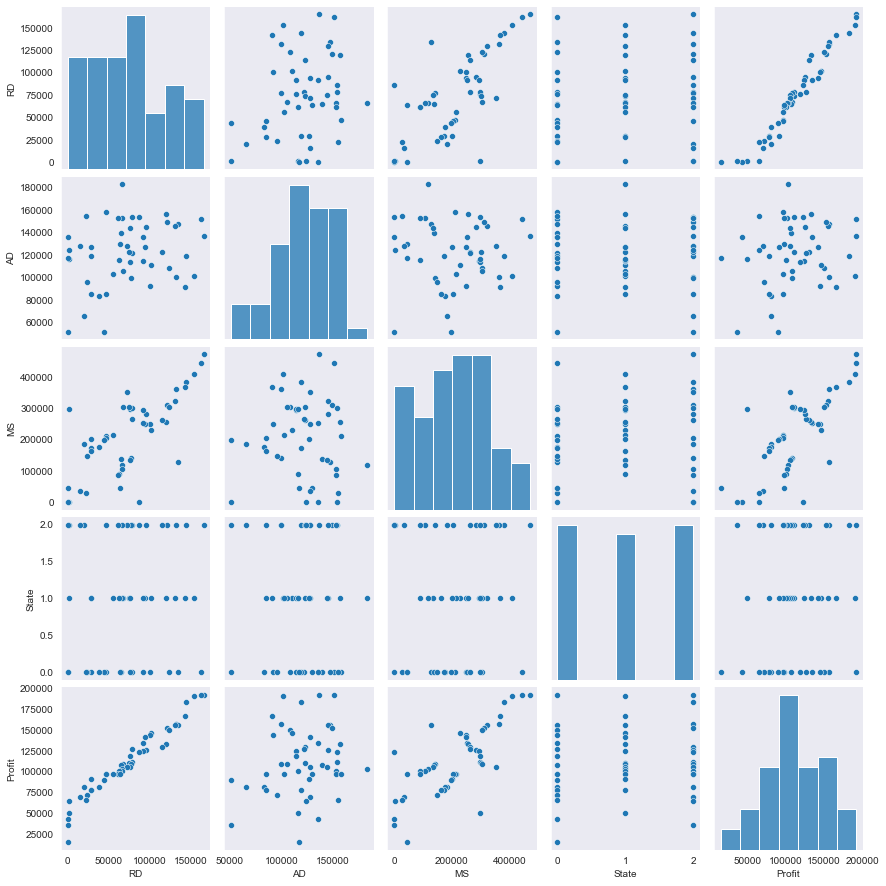

In [9]:
sns.set_style(style= "dark")
sns.pairplot(startups_50)

###  Correlation Matrix

In [10]:
startups_50.corr()

,RD,AD,MS,State,Profit
RD,1.000000,0.241955,0.724248,0.104685,0.972900
AD,0.241955,1.000000,-0.032154,0.011847,0.200717
MS,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


###  Building a multiple linear regression model

In [11]:
model_mlr = slg.ols("Profit ~ RD + AD + MS + State", data=startups_50).fit()

In [12]:
rsq_mlr = model_mlr.rsquared
rsqadj_mlr = model_mlr.rsquared_adj
aic_mlr = model_mlr.aic

In [13]:
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           8.51e-29
Time:                        19:10:59   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD             0.8058      0.046     17.609      0.000       0.714       0.898
AD            -0.0268      0.052     -0.520      0.606      -0.131       0.077
MS             0.0272      0.017      1.637      0.109      -0.006       0.061
State        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Since p-value for AD, MS and State is greater than 0.05 so these variables are insignificant 


##  Modal Validation Technique 

##  Calculating VIF

In [14]:
RSQ_RD = slg.ols('RD ~ AD + MS + State',data=startups_50).fit().rsquared  
VIF_RD = 1/(1-RSQ_RD)

RSQ_AD = slg.ols('AD ~ RD + MS + State',data=startups_50).fit().rsquared  
VIF_AD = 1/(1-RSQ_AD) 

RSQ_MS = slg.ols('MS ~ RD + AD + State',data=startups_50).fit().rsquared  
VIF_MS = 1/(1-RSQ_MS) 

RSQ_State = slg.ols('State ~ RD + AD + MS',data=startups_50).fit().rsquared  
VIF_State = 1/(1-RSQ_State)

# Storing vif values in a data frame
DATA = {'Variables':['RD','AD','MS','State'],'VIF':[VIF_RD,VIF_AD,VIF_MS,VIF_State]}
DATA_VIF = pd.DataFrame(DATA)  
DATA_VIF

,Variables,VIF
0,RD,2.481178
1,AD,1.175315
2,MS,2.326780
3,State,1.011281


###  Here VIF < 10 so there is no multicolinearity 

## Residual Analysis 

###  Residual Plot for Homoscedasticity

In [15]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

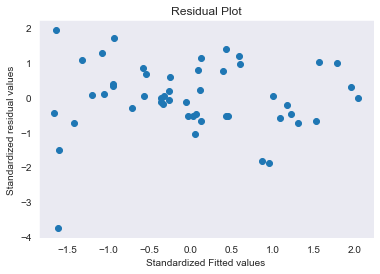

In [23]:
plt.scatter(get_standardized_values(model_mlr.fittedvalues),
            get_standardized_values(model_mlr.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

###  Checking for normality 

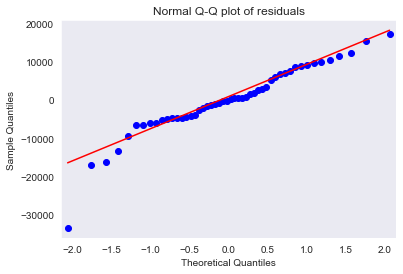

In [24]:
qqplot=sm.qqplot(model_mlr.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

##  Model Diagnostics Technique 

###  Cook's distance 

In [25]:
model_influence = model_mlr.get_influence()
(a,_) = model_influence.cooks_distance

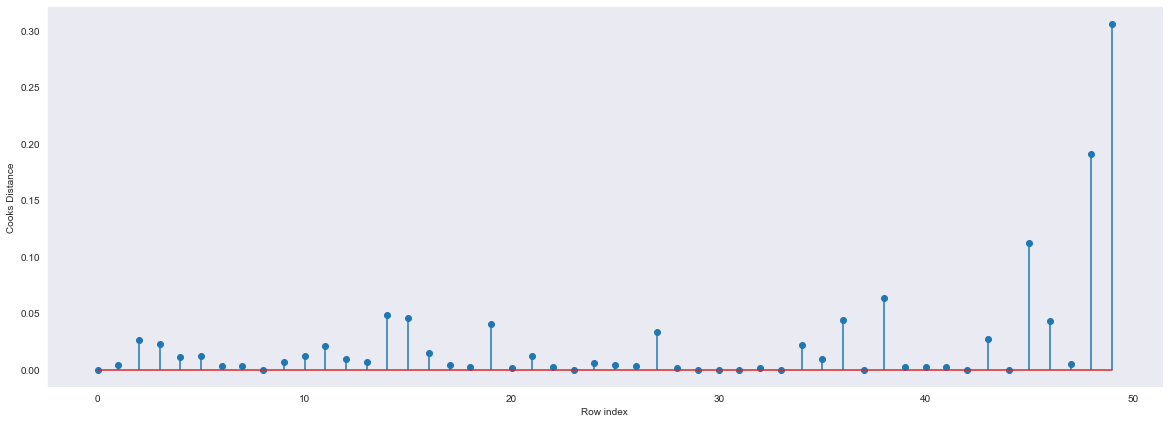

In [26]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups_50)), np.round(a, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(a),np.max(a))

(49, 0.3060281954699341)

####     Since the value is less than one, so don't need to do diagnostic process 

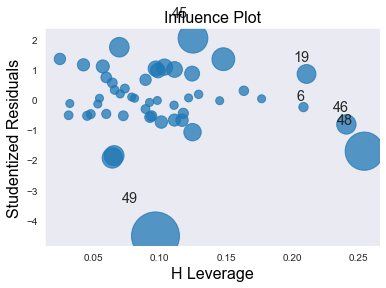

In [28]:
influence_plot(model_mlr)
plt.show()

In [29]:
k = startups_50.shape[1]
n = startups_50.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

####  Hence there is no outliers

##     Building a new multiple linear regression model

####   First model

In [30]:
model_rms = slg.ols("Profit ~ RD + MS + State", data=startups_50).fit()

In [31]:
rsq_rms = model_rms.rsquared
rsqadj_rms = model_rms.rsquared_adj
aic_rms = model_rms.aic

In [32]:
model_rms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     294.1
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           5.20e-30
Time:                        19:11:55   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.699e+04   3044.792     15.431      0.000    4.09e+04    5.31e+04
RD             0.7966      0.042     19.013      0.000       0.712       0.881
MS             0.0299      0.016      1.906      0.063      -0.002       0.061
State        -10.7579   1596.857     -0.007      0.995   -3225.064    3203.549
==============================================================================
Omnibus:                       14.690   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.211
Skew:                          -0.939   Prob(JB):                     2.48e-05
Kurtosis:                       5.580   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  Second model

In [33]:
model_rma = slg.ols("Profit ~ RD + MS + AD", data=startups_50).fit()

In [34]:
rsq_rma = model_rma.rsquared
rsqadj_rma = model_rma.rsquared_adj
aic_rma = model_rma.aic

In [35]:
model_rma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           4.53e-30
Time:                        19:12:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####   Third model 

In [36]:
model_rm = slg.ols("Profit ~ RD + MS ", data=startups_50).fit()

In [37]:
rsq_rm = model_rm.rsquared
rsqadj_rm = model_rm.rsquared_adj
aic_rm = model_rm.aic

In [38]:
model_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           2.16e-31
Time:                        19:12:04   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##   Table for rsquared, adjacent rsquared and aic values 

In [39]:
table = pd.DataFrame({"Variables":["model_mlr","model_rms","model_rma","model_rm"],
                      "Rsquared_values":[rsq_mlr,rsq_rms,rsq_rma,rsq_rm],
                      "Rsquared_adjacent":[rsqadj_mlr,rsqadj_rms,rsqadj_rma,rsqadj_rm],
                      "AIC_Values":[aic_mlr,aic_rms,aic_rma,aic_rm]})
table

,Variables,Rsquared_values,Rsquared_adjacent,AIC_Values
0,model_mlr,0.950746,0.946368,1060.771285
1,model_rms,0.950450,0.947219,1059.070723
2,model_rma,0.950746,0.947534,1058.771499
3,model_rm,0.950450,0.948342,1057.070772


###   Considering above table model_rm is better than others because rsquared value is 0.9504 and aic is 1057.07 which is less than other aic values 

##   Predicting values for model_rm

In [40]:
pred_1 = model_rm.predict(startups_50)
pred_1

0     192800.458625
1     189774.659480
2     181405.378097
3     173441.308842
4     171127.623218
5     162879.310812
6     158028.130454
7     160455.738877
8     152317.803673
9     154343.813935
10    135011.914724
11    134638.870075
12    129218.396579
13    127812.205465
14    150192.491797
15    146032.715433
16    117025.891848
17    130829.444732
18    128882.198828
19    115816.418333
20    116650.892092
21    118384.170709
22    114990.384639
23    109886.185217
24    112552.187151
25    102612.909242
26    110990.792884
27    114978.605150
28    103125.012760
29    102440.424090
30     99085.219562
31     98314.548854
32     98864.662254
33     97600.730445
34     90262.641219
35     89776.494285
36     75824.233912
37     87974.014518
38     68631.318323
39     82924.815275
40     75049.056031
41     74113.888705
42     70234.250574
43     60390.232852
44     65489.729308
45     47829.573980
46     56909.800859
47     46975.864221
48     47407.652602
49     48326.894462


In [41]:
new_data=pd.DataFrame({'RD':152578, 'MS':120000},index=[1])

In [42]:
pred_2 = model_rm.predict(new_data)
pred_2

1    172106.009519
dtype: float64